In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1bdE0Qz_AZwlZw8b4K9cRYrLveMVphwQi'
fluff, id = link.split('=')
file = drive.CreateFile({'id':id}) # replace the id with id of file you want to access
file.GetContentFile('churn.all') 

In [0]:
data=pd.read_csv('churn.all')
#data.head()

# Data Preprocessing 

In [0]:
#remove extra white space
data['intl_plan']=data['intl_plan'].map(lambda x:x.strip())
data['voice_mail_plan']=data['voice_mail_plan'].map(lambda x:x.strip())
data['churned']=data['churned'].map(lambda x:x.strip())
data.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [0]:
data['voice_mail_plan'][0]

'yes'

In [94]:
# Get ground truth data
data_y=np.where(data['churned']=='True.', 1,0) 
data_X=data.drop(['area_code','phone_number','churned'],axis=1)
data_x=data.drop(['area_code','phone_number','churned'],axis=1)
#data_x["intl_plan","voice_mail_plan"]=data["intl_plan","voice_mail_plan"]=='yes'
yes_no=['intl_plan','voice_mail_plan']
data_x[yes_no]=data_x[yes_no]=='yes'
data_x


,state,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,KS,128,False,False,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,False,False,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,False,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,False,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
5,AL,118,False,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
6,MA,121,False,False,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3
7,MO,147,False,False,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0
8,LA,117,False,False,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
9,WV,141,False,False,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0


# **Find out some basic information among features**






In [0]:
import pandas_profiling
pandas_profiling.ProfileReport(data)
               

Number of variables,21
Number of observations,5000
Total Missing (%),0.0%
Total size in memory,820.4 KiB
Average record size in memory,168.0 B
Numeric,12
Categorical,4
Boolean,0
Date,0
Text (Unique),1
Rejected,4


# Find out whether some missing values exist in the dataset 

In [0]:
data.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,42.209182,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [0]:
data.isnull().sum()

state                            0
account_length                   0
area_code                        0
phone_number                     0
intl_plan                        0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churned                          0
dtype: int64

In [0]:
np.where(data.duplicated())

(array([], dtype=int64),)

In [0]:
import seaborn as sns

In [0]:
#one hot encoding
data_x=pd.get_dummies(data_x, columns=['state'])
data_x.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,0,0
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,0,0
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,0,0
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,0,0,0
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn import model_selection

In [0]:
#split the dataset into 25% test and 75% traning 
x_train, x_test,y_train,y_test=model_selection.train_test_split(data_x,data_y,test_size=0.25)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
#standardlization
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


# Model Selection and Evaluation 

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [0]:
# Logistic Regression
classifier_logistic = LogisticRegression()
# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()
# Random Forest
classifier_RF = RandomForestClassifier()
# SVM
svm=SVC(probability=True)

In [0]:
classifier_logistic.fit(x_train,y_train)
classifier_logistic.predict(x_test)
classifier_logistic.score(x_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.876

In [0]:
model_name=['logistic_regression', 'random_forest','knn','svm']
model_list=[classifier_logistic,classifier_KNN, classifier_RF,svm]
count=0

for classifier in model_list:
  cv_score=model_selection.cross_val_score(classifier,x_train,y_train,cv=5)
  print ('Model accuracy of %s is: %.3f'%(model_name[count],cv_score.mean()))
  count+=1

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Model accuracy of logistic_regression is: 0.870
Model accuracy of random_forest is: 0.866


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

Model accuracy of knn is: 0.930


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default 

Model accuracy of svm is: 0.879


# Use Grid Search to Find Optimal Hyperparameters

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
def print_gridsearch(model):
  print('Best score is %0.3f'% model.best_score_)
  print('best parameters set')
  best_parameters = model.best_params_
  for param_name in sorted(parameters.keys()):
       print("\t%s: %r" % (param_name, best_parameters[param_name]))

**Find best hyperparameters for logistic regression** 

In [0]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the lambda value(weight) for L1 and L2
parameters={'penalty':('l1','l2'),
           'C':(1,5,10)}
Grid_LR=GridSearchCV(LogisticRegression(),parameters,cv=5)

In [0]:
Grid_LR.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ('l1', 'l2'), 'C': (1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
print_gridsearch(Grid_LR)

Best score is 0.863
best parameters set
	C: 1
	penalty: 'l1'


In [0]:
best_LR_model = Grid_LR.best_estimator_

In [0]:
Grid_LR.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

**find the best parameters for KNN**

In [0]:
parameters={'n_neighbors':[3,5,7,10]}
Grid_Knn=GridSearchCV(KNeighborsClassifier(),parameters,cv=5)


In [0]:
Grid_Knn.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [3, 5, 7, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [0]:
best_Knn_model=Grid_Knn.best_estimator_

**find the best parameters for Random Forest**

In [0]:
parameters={'n_estimators' :[40,60,80]}
Grid_randomforest=GridSearchCV(RandomForestClassifier(),parameters,cv=5)


In [0]:
Grid_randomforest.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [40, 60, 80]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [0]:
best_RF_model=Grid_randomforest.best_estimator_

In [0]:
Grid_randomforest.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

**find the best parameters for SVM**

In [0]:
parameters={'kernel':['linear','rbf','poly','sigmoid']}
Grid_SVM=GridSearchCV(SVC(),parameters,cv=5)

In [0]:
Grid_SVM.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default 

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
best_SVM_model=Grid_SVM.best_estimator_

# Model Evaluation - Confusion Matrix & Precision &Recall

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

In [0]:
def cal_evaluation(classifier, cm):
  tn=cm[0][0]
  fp=cm[0][1]
  fn=cm[1][0]
  tp=cm[1][1]
  
  accuracy=(tp + tn) / (tp + fp + fn + tn + 0.0)
  precision=tp/(tp + fp + 0.0)
  recall=tp/(tp + fn + 0.0)
  print(classifier)
  print ("Accuracy is: %0.3f" % accuracy)
  print ("precision is: %0.3f" % precision)
  print ("recall is: %0.3f" % recall)

In [0]:
def draw_confusion_matrix(confusion_matricies):
  class_names = ['Not','Yes']
  for cm in confusion_matricies:
    classifier, cm = cm[0], cm[1]
    cal_evaluation(classifier, cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Blues'))
    plt.title('Confusion matrix for %s' % classifier)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + class_names)
    ax.set_yticklabels([''] + class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [0]:
confusion_matricies=[
    ('Random Forest', confusion_matrix(y_test,best_RF_model.predict(x_test))),
    ('KNN', confusion_matrix(y_test,best_Knn_model.predict(x_test))),
    ('Logistic Regression', confusion_matrix(y_test,best_LR_model.predict(x_test))),
    ('SVM', confusion_matrix(y_test,best_SVM_model.predict(x_test)))
    
]

Random Forest
Accuracy is: 0.957
precision is: 0.952
recall is: 0.713


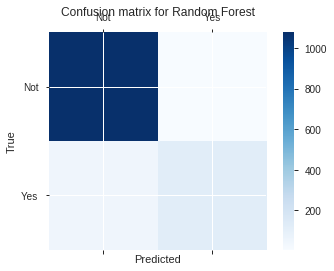

KNN
Accuracy is: 0.871
precision is: 0.688
recall is: 0.066


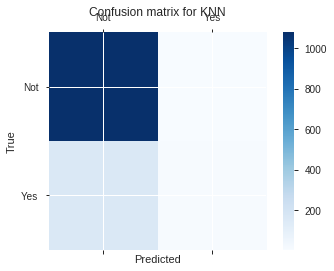

Logistic Regression
Accuracy is: 0.875
precision is: 0.573
recall is: 0.257


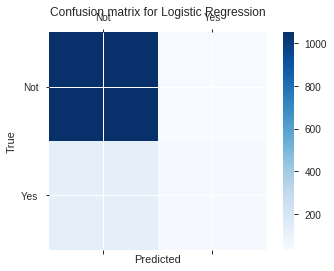

SVM
Accuracy is: 0.882
precision is: 0.917
recall is: 0.132


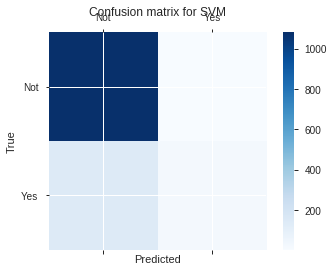

In [0]:
%matplotlib inline
draw_confusion_matrix(confusion_matricies)

**Model Evaluation - ROC & AUC**

In [0]:
from sklearn.metrics import roc_curve
from sklearn import metrics

**Random Forest ROC&AUC**

In [0]:
y_pred_rf = best_RF_model.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
metrics.auc(fpr_rf,tpr_rf)

0.9226505437877707

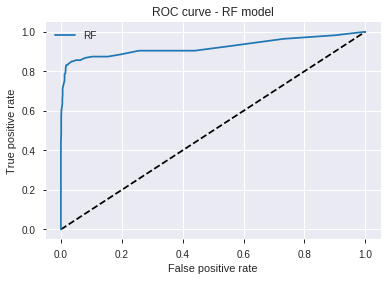

In [0]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

**Knn ROC&AUC**

In [0]:
y_pred_knn = best_Knn_model.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_knn)
metrics.auc(fpr_rf,tpr_rf)

0.7218222834110173

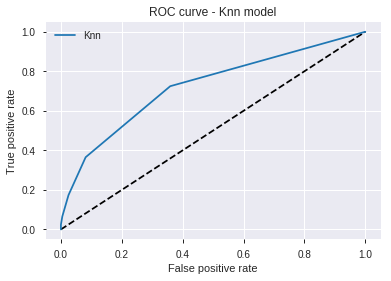

In [0]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Knn')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Knn model')
plt.legend(loc='best')
plt.show()

**logistic Regression ROC&AUC**

In [78]:
y_pred_lr = best_LR_model.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_lr)
metrics.auc(fpr_rf,tpr_rf)

0.8363494617413373

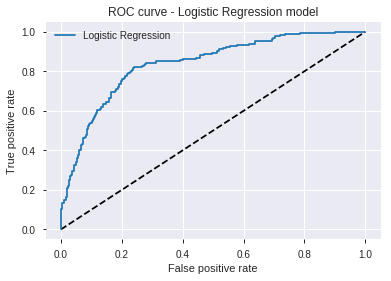

In [79]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Logistic Regression model')
plt.legend(loc='best')
plt.show()

**SVM ROC&AUC**

In [0]:
#y_pred_svm = best_SVM_model.predict_proba(x_test)[:, 1]
#fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_svm)
#metrics.auc(fpr_rf,tpr_rf)

# Feature Engineering

**Apply L1 & L2 to find out correlation features**

In [97]:
#L1
x_l1=scaler.fit_transform(x_train)
LRmodel_l1 = LogisticRegression(penalty="l1", C = 1)
LRmodel_l1.fit(x_l1, y_train)
LRmodel_l1.coef_[0]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([ 0.02571254,  0.62977023, -1.00196699,  0.5844634 ,  0.52232061,
        0.02271814,  0.25283709,  0.21140355, -0.02426585,  0.12033856,
        0.14249815,  0.00942497,  0.10009903,  0.        , -0.18419678,
        0.21089957,  0.67754943, -0.06123357, -0.01428637,  0.04665379,
       -0.05353171,  0.12732852, -0.02856681,  0.02219454, -0.06066226,
        0.00948601,  0.        , -0.03834194, -0.11572943,  0.05021746,
        0.03624614, -0.13305662, -0.01764908,  0.02348383,  0.04131612,
       -0.02564117,  0.01583553,  0.03172685,  0.05232909,  0.0206256 ,
       -0.00657641, -0.04012527,  0.02539021,  0.16382967, -0.02865844,
       -0.02083744, -0.06495066,  0.        ,  0.09689334, -0.0228726 ,
        0.04414092,  0.06135959, -0.00375457,  0.        ,  0.04133982,
       -0.02995148, -0.17124655,  0.10862727, -0.00956245,  0.02039159,
        0.10112103,  0.00579662, -0.22872578, -0.06979636,  0.10850131,
       -0.05761365,  0.02574548, -0.0896411 ])

In [98]:
print ("Logistic Regression (L1) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l1.coef_[0]), \
                      data_X.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))

Logistic Regression (L1) Coefficients
intl_plan: -1.002
total_intl_charge: 0.6775
account_length: 0.6298
voice_mail_plan: 0.5845
number_vmail_messages: 0.5223
total_day_calls: 0.2528
total_day_charge: 0.2114
total_intl_calls: 0.2109
total_intl_minutes: -0.1842
total_eve_charge: 0.1425
total_eve_calls: 0.1203
total_night_calls: 0.1001
number_customer_service_calls: -0.0612
state: 0.0257
total_eve_minutes: -0.0243
total_day_minutes: 0.0227
total_night_minutes: 0.0094
total_night_charge: 0.0


In [99]:
#L2
x_l2=scaler.fit_transform(x_train)
LRmodel_l1 = LogisticRegression(penalty="l2", C = 5)
LRmodel_l1.fit(x_l1, y_train)
LRmodel_l1.coef_[0]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([ 2.90216563e-02,  6.35124348e-01, -1.10250483e+00,  6.78272359e-01,
        4.03889131e-01,  2.63824323e-02,  3.79551002e-01,  1.65617514e-01,
       -2.80420417e-02,  1.71552313e-01,  1.05370192e-01,  1.35765820e-02,
        1.43362358e-01, -2.93239745e-02, -1.88229905e-01,  2.44127367e-01,
        6.83928659e-01, -6.27580720e-02, -1.36670953e-02,  5.21272161e-02,
       -5.42655951e-02,  1.32149800e-01, -2.84802654e-02,  2.72570597e-02,
       -6.24850833e-02,  1.44103470e-02,  4.28970957e-03, -3.87192233e-02,
       -1.18438000e-01,  5.58707039e-02,  4.32079621e-02, -1.36163295e-01,
       -1.82883543e-02,  2.85919951e-02,  4.67073855e-02, -2.58269894e-02,
        2.26655422e-02,  3.64363862e-02,  5.81430026e-02,  2.67216293e-02,
       -5.97684169e-03, -4.12429149e-02,  3.09372252e-02,  1.70107257e-01,
       -2.92822310e-02, -2.12093876e-02, -6.66731196e-02,  7.46671260e-04,
        1.02412333e-01, -2.27749365e-02,  4.87496971e-02,  6.71946988e-02,
       -3.10460252e-03,  

In [100]:
print ("Logistic Regression (L2) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l1.coef_[0]), \
                      data_X.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))

Logistic Regression (L2) Coefficients
intl_plan: -1.1025
total_intl_charge: 0.6839
voice_mail_plan: 0.6783
account_length: 0.6351
number_vmail_messages: 0.4039
total_day_calls: 0.3796
total_intl_calls: 0.2441
total_intl_minutes: -0.1882
total_eve_calls: 0.1716
total_day_charge: 0.1656
total_night_calls: 0.1434
total_eve_charge: 0.1054
number_customer_service_calls: -0.0628
total_night_charge: -0.0293
state: 0.029
total_eve_minutes: -0.028
total_day_minutes: 0.0264
total_night_minutes: 0.0136


**Random Forest- Compare Feature Importance**

In [102]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [103]:
importances = forest.feature_importances_
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), data_X.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
total_day_calls: 0.127
number_vmail_messages: 0.1263
total_intl_charge: 0.1087
account_length: 0.0751
total_eve_calls: 0.0665
total_night_charge: 0.053
total_day_charge: 0.045
total_eve_charge: 0.039
total_intl_minutes: 0.0373
total_day_minutes: 0.0361
total_night_calls: 0.0354
state: 0.0352
total_intl_calls: 0.0321
total_night_minutes: 0.0299
voice_mail_plan: 0.0267
total_eve_minutes: 0.025
intl_plan: 0.023
number_customer_service_calls: 0.0005
